In [28]:
"""Module to test the pollution of a village"""
import matplotlib.pyplot as plt
import numpy as np

HEIGHT = 10 # Meters
NITER = 200 # Weeks
GROUND_DIFFUSION=0.2
WATER_DRAIN_FACTOR=0.3
DURATION = 10 # Weeks
AMOUNT =1 # Tons

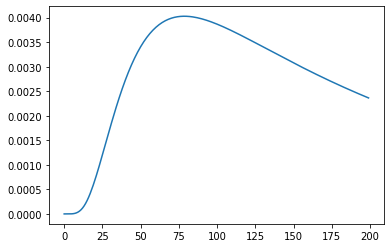

In [29]:
def compute_pollution_raw():
    """Compute the pollution
    :return: water_flux_list , list of real in ton/week
    """
    layers = [0,0,0,0]
    deltax = HEIGHT/4
    cond_coef = GROUND_DIFFUSION/deltax**2
    water_coef = WATER_DRAIN_FACTOR/deltax
    water_flux_list = list()
    
    #Iterate
    for week in range(NITER):
        # BCs
        if week<DURATION:
            pollutant_flux = AMOUNT / DURATION
        else:
            pollutant_flux = 0.
        
        water_flux = layers[-1]*water_coef
        
        # Fluxes
        layers_flux01 = (layers[0]-layers[1])*cond_coef
        layers_flux12 = (layers[1]-layers[2])*cond_coef
        layers_flux23 = (layers[2]-layers[3])*cond_coef 

        # Updates
        layers[0] += pollutant_flux - layers_flux01
        layers[1] += layers_flux01 - layers_flux12
        layers[2] += layers_flux12 - layers_flux23
        layers[3] += layers_flux23 - water_flux
    
        # Store monitoring
        water_flux_list.append(water_flux)

    return water_flux_list
    
wfl = compute_pollution_raw()
plt.plot(wfl)
plt.show()

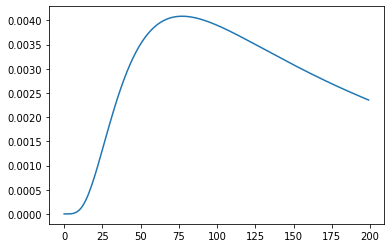

In [30]:
HEIGHT = 10
GROUND_DIFFUSION=0.2
WATER_DRAIN_FACTOR=0.3
NITER = 200

def compute_pollution():
    """Compute the pollution
    :return: water_flux_list , list of real in ton/week
    """
    #initial bc
    layers = [0,0,0,0]
    
    water_flux_list = list()
    #Iterate
    for week in range(NITER):
        # Apply evolution
        layers = iteration_4(layers)
        # Apply BCs
        layers,water_flux = apply_boundaries(week, layers)
        # Store monitoring
        water_flux_list.append(water_flux)

    return water_flux_list
    
wfl = compute_pollution()
plt.plot(wfl)
plt.show()

In [31]:
def iteration_4(layers_in):
    """Apply evolution of difusion on the ground.
    
    :param: layers_in, list, the ground before iteration
    :returns: layers, list, the ground after iteration
    """
    layers_out = list(layers_in)
    nlayers = len(layers_in)
    deltax = HEIGHT/nlayers
    cond_coef = GROUND_DIFFUSION/deltax**2
    layers_flux01 = (layers_in[0]-layers_in[1])*cond_coef
    layers_flux12 = (layers_in[1]-layers_in[2])*cond_coef
    layers_flux23 = (layers_in[2]-layers_in[3])*cond_coef 
   
    layers_out[0] += 0 - layers_flux01
    layers_out[1] += layers_flux01 - layers_flux12
    layers_out[2] += layers_flux12 - layers_flux23
    layers_out[3] += layers_flux23 - 0
    return layers_out

print(iteration_4([1, 0, 0, -1]))

[0.968, 0.032, -0.032, -0.968]


In [32]:
def apply_boundaries(week, layers_in):
    """Apply evolution of difusion on the ground.
    :week: time, for time dependdend BC..
    :param: layers_in, list, the ground before BCs
    
    :returns: 
        layers, list, the ground after BCs
        water_flux, real, the pollution in the water
    """
    layers_out = list(layers_in)
    nlayers = len(layers_in)
    
    deltax = HEIGHT/nlayers
    
    water_coef = WATER_DRAIN_FACTOR/deltax
    water_flux = layers_in[-1]*water_coef
    
    layers_out[0] += pollutant_flux(week)
    layers_out[-1] -= water_flux
    return layers_out, water_flux

out4, wf = apply_boundaries(1, [1./4, 1./4, 1./4, 1./4])
print(out4, wf)
print(sum(out4))

out5, wf = apply_boundaries(1, [1./5, 1./5, 1./5, 1./5, 1./5])
print(out5, wf)
print(sum(out5))

[0.35, 0.25, 0.25, 0.22] 0.03
1.07
[0.30000000000000004, 0.2, 0.2, 0.2, 0.17] 0.03
1.0699999999999998


In [33]:
def pollutant_flux(week):
    if week<DURATION:
        out = AMOUNT / DURATION
    else:
        out = 0.
    return out
print(pollutant_flux(5))
print(pollutant_flux(15))

0.1
0.0


In [34]:
def iteration_n(layers_in):
    """Apply evolution of difusion on the ground.
    n_layers using numpy
    
    :param: layers_in, list, the ground before iteration
    :returns: layers, list, the ground after iteration
    """
    layers_out = np.copy(layers_in)
    nlayers = layers_out.shape[0]
    
    deltax = HEIGHT/nlayers
    cond_coef = GROUND_DIFFUSION/deltax**2
    inner_fluxes = -np.diff(layers_in)*cond_coef
    
    layers_out[:-1] -= inner_fluxes
    layers_out[1:] += inner_fluxes
    
    return layers_out

print(iteration_n(np.array([1., 0., 0., -1.])))

[ 0.968  0.032 -0.032 -0.968]


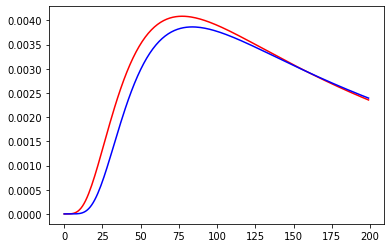

In [35]:
"""Module to test the pollution of a village"""


def compute_pollution_n(nb_layers):
    """Compute the pollutiuon
    :param: nb_layers, int , nb of layers
    
    :return: water_flux_list , list of real in ton/week
    """
    layers = np.zeros(nb_layers)
    water_flux_list = list()
    
    #Iterate
    for week in range(NITER):
        # Apply evolution
        layers = iteration_n(layers)
        # Apply BCs
        layers,water_flux = apply_boundaries(week, layers)
        
        # Store monitoring
        water_flux_list.append(water_flux)
        
    return water_flux_list
    
wfl_n = compute_pollution_n(6)

plt.plot(wfl, 'r') # plotting t, a separately 
plt.plot(wfl_n, 'b')
plt.show()